In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs = 1, batch_size = 30)

2000/2000 [==============================] - 115s 57ms/step - loss: 0.1314 - accuracy: 0.9592


In [6]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Loss :", loss)
print("Accuracy :", accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.0701 - accuracy: 0.9774
Loss : 0.07007394731044769
Accuracy : 0.977400004863739


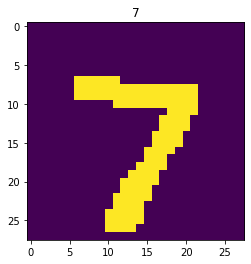

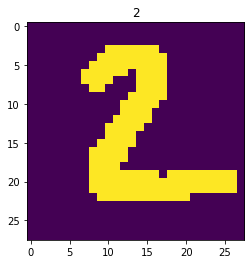

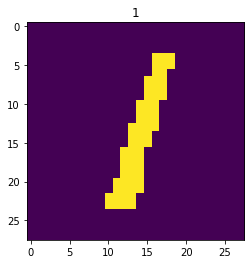

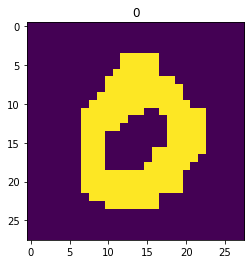

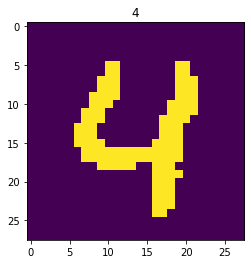

In [10]:
predection = model.predict(x_test)
for i in range(5):
  plt.imshow(x_test[i].reshape(x_test[0].shape[0], x_test[0].shape[1]))
  plt.title(np.argmax(predection[i]))
  plt.show()

In [11]:
model.save('save')

INFO:tensorflow:Assets written to: save\assets
